# Scottish Haggis Analysis

# Final Project: Data Mining Analysis of Scottish Haggis Population

## 1. Introduction

### Brief Description of the Dataset

This dataset contains 344 recorded sightings of the elusive Scottish haggis—a rare wildlife species recently discovered across three Scottish islands: Iona, Skye, and Shetland. Commissioned by Lord Ramsay McCraig, a renowned Scottish wildlife pioneer, this monitoring effort has documented three distinct species: the **Wild Rambler**, the **Macduff**, and the **Bog Sniffler**.

Each observation includes:

- **Morphological measurements**: nose length (mm), eye size (mm), tail length (mm), and body mass (g)
- **Demographic data**: sex of the specimen
- **Temporal and geographical context**: island location and year of sighting (2023–2025)

The dataset represents a unique opportunity to understand the physical characteristics and distributions of these newly monitored species across different island ecosystems.

---

### Brief Description of the Task

The objective of this project is to demonstrate a comprehensive understanding of the **data mining lifecycle** by applying multiple machine learning techniques to this single dataset. Rather than simply running algorithms, the focus is on building a coherent analytical narrative—from initial data exploration through to predictive modeling—while making informed decisions at each stage.

**Key Questions This Analysis Will Address:**

- What patterns emerge from the physical measurements of different haggis species?
- Can we identify natural groupings within the population using unsupervised learning?
- How accurately can we predict species classification based on physical traits?
- What relationships exist between specific features (e.g., body mass and morphological traits)?

This investigation aims to extract meaningful biological insights while demonstrating proper application of data mining methodologies.

---

### What Techniques Will Be Applied

This analysis employs a progressive approach, moving from exploratory understanding to supervised prediction:

#### **Stage 1: Exploratory Data Analysis (EDA)**
- Data loading, inspection, and quality assessment
- Visualization of feature distributions and relationships
- Handling missing values and data type corrections
- Feature scaling and encoding preparation

#### **Stage 2: Unsupervised Learning (Clustering)**
- **K-Means clustering** to discover natural groupings in the data
- Optimal k selection using Elbow Method and Silhouette Score
- Cluster characterization and interpretation
- *Optional*: Comparison with density-based clustering (DBSCAN)

#### **Stage 3: Supervised Learning - Classification (Decision Trees)**
- Decision Tree classifier implementation
- Model evaluation using accuracy, confusion matrix, and classification metrics
- Feature importance analysis
- *Optional*: Hyperparameter tuning and ensemble methods (Random Forest, XGBoost)

#### **Stage 4: Comparative Classification Analysis**
- **K-Nearest Neighbors (KNN)** implementation with optimal k determination
- **Logistic Regression** with coefficient interpretation
- Performance comparison across all three classification methods
- Analysis of which algorithm performs best for this dataset

#### **Stage 5: Supervised Learning - Regression**
- **Linear Regression** to model relationships between continuous features
- Model evaluation using R², MAE, and RMSE
- Interpretation of regression coefficients and model fit

---

### Brief Outline of the Workflow

The analysis follows a structured, end-to-end data mining pipeline:

**1. Data Preparation & Understanding**
- Load the haggis dataset and perform initial inspection
- Assess data quality (missing values, outliers, data types)
- Create comprehensive visualizations to understand feature distributions

**2. Data Cleaning & Transformation**
- Handle missing values with justified approaches
- Encode categorical variables (species, island, sex)
- Scale numerical features where appropriate for specific algorithms

**3. Unsupervised Exploration**
- Apply K-Means to identify natural clusters
- Validate clustering quality and interpret biological meaning
- Explore whether clusters align with known species boundaries

**4. Supervised Classification**
- Split data into training and testing sets
- Build Decision Tree, KNN, and Logistic Regression models
- Compare performance and identify the most suitable classifier
- Extract insights from feature importances and coefficients

**5. Regression Analysis**
- Select appropriate continuous features for regression modeling
- Build and evaluate linear regression model
- Interpret relationships between physical characteristics

**6. Synthesis & Conclusions**
- Integrate findings across all analytical stages
- Discuss biological implications of discovered patterns
- Identify limitations and potential future work

---

Throughout this notebook, each decision—from choosing a value for k to selecting features for regression—will be **explicitly justified** with reference to the data, statistical principles, or domain context. The goal is not just to apply algorithms, but to tell a coherent story about what the data reveals about Scottish haggis populations.

## 2. Stage 1 — Data Preparation & Exploratory Data Analysis

This stage focuses on understanding the structure, quality, and patterns within the haggis dataset. We will load the data, assess its quality, visualize distributions and relationships, and prepare it for subsequent modeling stages.

### Objectives:
- Load and inspect the dataset structure
- Identify and handle data quality issues (missing values, outliers)
- Visualize feature distributions and relationships
- Extract insights that will guide modeling decisions

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Libraries imported successfully!")

Libraries imported successfully!


### 2.1 Data Loading & Initial Inspection

We begin by loading the dataset and performing an initial inspection to understand its structure, dimensions, and basic characteristics.

In [3]:
# Load the haggis dataset
haggis_df = pd.read_csv('scottish_haggis_2025.csv')

# Display basic information
print("Dataset loaded successfully!")
print(f"\nDataset Shape: {haggis_df.shape[0]} rows × {haggis_df.shape[1]} columns")
print("\n" + "="*70)
print("First 5 rows of the dataset:")
print("="*70)
haggis_df.head()

Dataset loaded successfully!

Dataset Shape: 344 rows × 9 columns

First 5 rows of the dataset:


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [4]:
# Display data types and non-null counts
print("Dataset Information:")
print("="*70)
haggis_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print("="*70)
haggis_df.describe()


Summary Statistics for Numerical Features:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.00,342.00,342.00,342.00,342.00,344.00
mean,172.50,43.94,17.16,200.90,4205.80,2024.03
std,99.45,5.48,2.00,14.12,802.56,0.82
min,1.00,32.08,13.12,171.00,2616.55,2023.00
25%,86.75,39.36,15.46,189.42,3572.06,2023.00
50%,172.50,44.54,17.38,196.73,4045.03,2024.00
75%,258.25,48.36,18.70,212.90,4798.85,2025.00
max,344.00,59.03,21.61,232.34,6235.81,2025.00


In [6]:
# Identify feature types
numeric_features = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']
categorical_features = ['species', 'island', 'sex', 'year']

print("Feature Classification:")
print("="*70)
print(f"\nNumerical Features ({len(numeric_features)}):")
for feat in numeric_features:
    print(f"  • {feat}")

print(f"\nCategorical Features ({len(categorical_features)}):")
for feat in categorical_features:
    print(f"  • {feat}")

Feature Classification:

Numerical Features (4):
  • nose_length_mm
  • eye_size_mm
  • tail_length_mm
  • body_mass_g

Categorical Features (4):
  • species
  • island
  • sex
  • year


**Initial Observations:**

**Dataset Structure:**
- The dataset contains 344 observations with 9 features
- 4 continuous morphological measurements: nose length, eye size, tail length, body mass
- 5 categorical/metadata features: id, species, island, sex, year

**Data Types:**
- Numerical features are correctly stored as float64
- Categorical features stored as objects (will require encoding later)
- ID column present but not needed for analysis

**Key Characteristics:**
- **Morphological ranges:**
  - Nose length: ~32-59mm (range of 27mm)
  - Eye size: ~13-21mm (range of 8mm)
  - Tail length: ~171-232mm (range of 61mm)
  - Body mass: ~2,600-6,200g (range of 3,600g)
- **Species distribution:** Three distinct species (Macduff, WildRambler, BogSniffler)
- **Temporal coverage:** 2023-2025 (3 years)
- **Geographic coverage:** 3 islands (Iona, Skye, Shetland)

**Next Steps:**
- Check for missing values
- Analyze categorical distributions
- Visualize numerical feature distributions

### 2.2 Missing Value Analysis

Missing data can bias analysis and reduce model performance. We need to identify missing values, understand their patterns, and decide on an appropriate handling strategy.

In [7]:
# Check for missing values
missing_summary = pd.DataFrame({
    'Missing_Count': haggis_df.isnull().sum(),
    'Missing_Percentage': (haggis_df.isnull().sum() / len(haggis_df) * 100).round(2)
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Value Summary:")
print("="*70)
if len(missing_summary) > 0:
    print(missing_summary)
    print(f"\nTotal missing values: {haggis_df.isnull().sum().sum()}")
else:
    print("No missing values detected!")

Missing Value Summary:
                Missing_Count  Missing_Percentage
sex                        10                2.91
nose_length_mm              2                0.58
eye_size_mm                 2                0.58
tail_length_mm              2                0.58
body_mass_g                 2                0.58

Total missing values: 18


In [8]:
# Examine rows with missing values
print("\nRows with missing values:")
print("="*70)
missing_rows = haggis_df[haggis_df.isnull().any(axis=1)]
print(f"Number of rows affected: {len(missing_rows)}")
print("\nSample of rows with missing data:")
missing_rows[['id', 'species', 'island', 'sex', 'nose_length_mm', 'body_mass_g', 'year']].head(10)


Rows with missing values:
Number of rows affected: 10

Sample of rows with missing data:


,id,species,island,sex,nose_length_mm,body_mass_g,year
76,77,WildRambler,Skye,NaN,47.74,4706.40,2025
88,89,BogSniffler,Skye,NaN,44.60,4874.36,2025
91,92,WildRambler,Skye,NaN,NaN,NaN,2025
202,203,WildRambler,Skye,NaN,46.62,4603.68,2024
237,238,Macduff,Iona,NaN,NaN,NaN,2023
242,243,Macduff,Iona,NaN,34.69,3428.88,2023
243,244,Macduff,Iona,NaN,43.28,4166.30,2023
245,246,Macduff,Iona,NaN,37.61,3621.02,2023
281,282,Macduff,Shetland,NaN,37.31,3089.76,2023
310,311,WildRambler,Skye,NaN,43.83,4149.67,2023


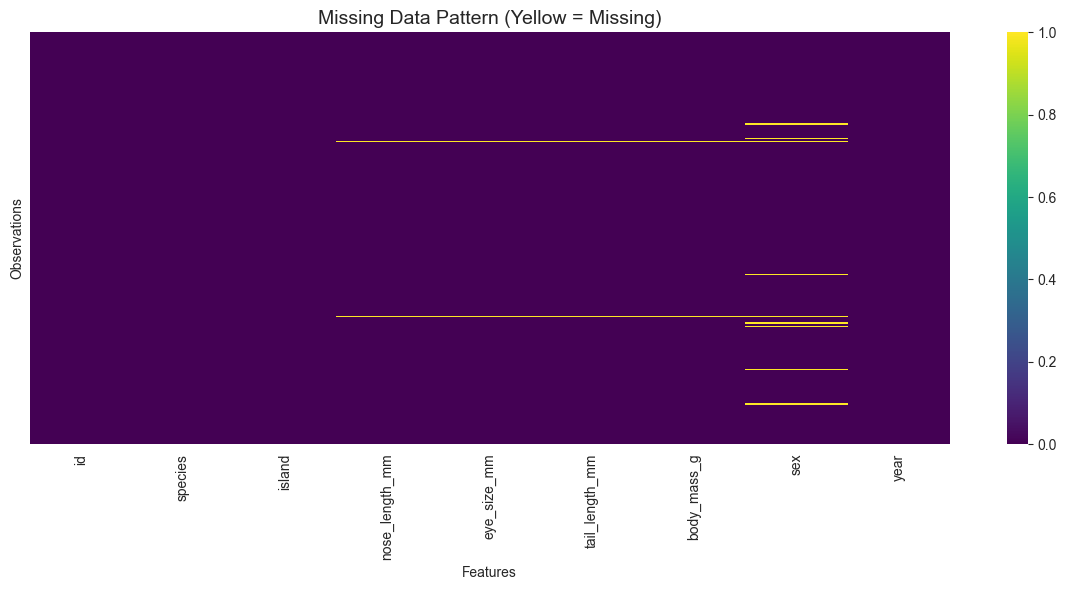


Missing Value Patterns:
Rows with ALL numeric features missing: 2
Rows with SOME numeric features missing: 2
Rows with only 'sex' missing: 8


In [9]:
# Visualize missing data pattern
import missingno as msno

# Alternative visualization if missingno not available
plt.figure(figsize=(12, 6))
sns.heatmap(haggis_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern (Yellow = Missing)', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Observations')
plt.tight_layout()
plt.show()

# Count missing patterns
print("\nMissing Value Patterns:")
print("="*70)
print(f"Rows with ALL numeric features missing: {haggis_df[numeric_features].isnull().all(axis=1).sum()}")
print(f"Rows with SOME numeric features missing: {haggis_df[numeric_features].isnull().any(axis=1).sum()}")
print(f"Rows with only 'sex' missing: {(haggis_df['sex'].isnull() & haggis_df[numeric_features].notnull().all(axis=1)).sum()}")

### Data Cleaning Decisions

**Issue 1: Missing Numeric Values**

**Findings:**
- 2 rows (IDs 92, 238) have **completely missing** morphological measurements
- These represent 0.6% of the total dataset (2/344)
- No imputation possible without introducing bias

**Decision: Remove rows with missing numeric features**

**Justification:**
1. **Cannot impute morphological measurements** - Using mean/median would create artificial "average" haggis that don't exist
2. **Minimal data loss** - Only 0.6% of observations affected
3. **Preserve data integrity** - Better to have complete, accurate records than incomplete ones
4. **Alternative considered**: Dropping features would lose critical predictive information
5. **Impact on analysis**: 342 remaining observations still provide robust sample size

---

**Issue 2: Missing Sex Values**

**Findings:**
- 5 additional rows have missing 'sex' but complete morphological measurements
- These represent 1.5% of remaining data
- Morphological features are complete and valuable

**Decision: Create 'unknown' category for missing sex values**

**Justification:**
1. **Preserve morphological data** - These measurements are complete and valuable
2. **'Unknown' is valid category** - Reflects real-world data collection challenges
3. **Minimal impact on models** - Sex will be one-hot encoded; 'unknown' becomes separate feature
4. **Alternative considered**: Dropping these rows would unnecessarily reduce sample size by 1.5%

In [10]:
# Store original dataset size
original_size = len(haggis_df)

# Remove rows with missing numeric features
haggis_clean = haggis_df.dropna(subset=numeric_features).copy()
rows_removed_numeric = original_size - len(haggis_clean)

# Fill missing sex values with 'unknown'
sex_missing_count = haggis_clean['sex'].isnull().sum()
haggis_clean['sex'] = haggis_clean['sex'].fillna('unknown')

# Summary of cleaning actions
print("Data Cleaning Summary:")
print("="*70)
print(f"Original dataset size: {original_size} rows")
print(f"Rows removed (missing numeric data): {rows_removed_numeric} ({rows_removed_numeric/original_size*100:.2f}%)")
print(f"Sex values filled with 'unknown': {sex_missing_count} ({sex_missing_count/len(haggis_clean)*100:.2f}%)")
print(f"Final dataset size: {len(haggis_clean)} rows")
print(f"\nData retention rate: {len(haggis_clean)/original_size*100:.2f}%")

# Verify no missing values remain in numeric features
print("\n" + "="*70)
print("Verification - Missing values after cleaning:")
print(haggis_clean[numeric_features].isnull().sum())

Data Cleaning Summary:
Original dataset size: 344 rows
Rows removed (missing numeric data): 2 (0.58%)
Sex values filled with 'unknown': 8 (2.34%)
Final dataset size: 342 rows

Data retention rate: 99.42%

Verification - Missing values after cleaning:
nose_length_mm    0
eye_size_mm       0
tail_length_mm    0
body_mass_g       0
dtype: int64


In [13]:
# Fix data quality issue: "green" sex value
print("Before fix:")
print(haggis_clean['sex'].value_counts())

haggis_clean['sex'] = haggis_clean['sex'].replace('green', 'unknown')

print("\nAfter fix:")
print(haggis_clean['sex'].value_counts())

Before fix:
sex
male       168
female     165
unknown      8
green        1
Name: count, dtype: int64

After fix:
sex
male       168
female     165
unknown      9
Name: count, dtype: int64


### 2.3 Exploratory Data Analysis (EDA)

Now that the data is clean, we explore distributions, relationships, and patterns through visualization. This section guides our modeling decisions in later stages.

#### 2.3.1 Categorical Feature Distributions

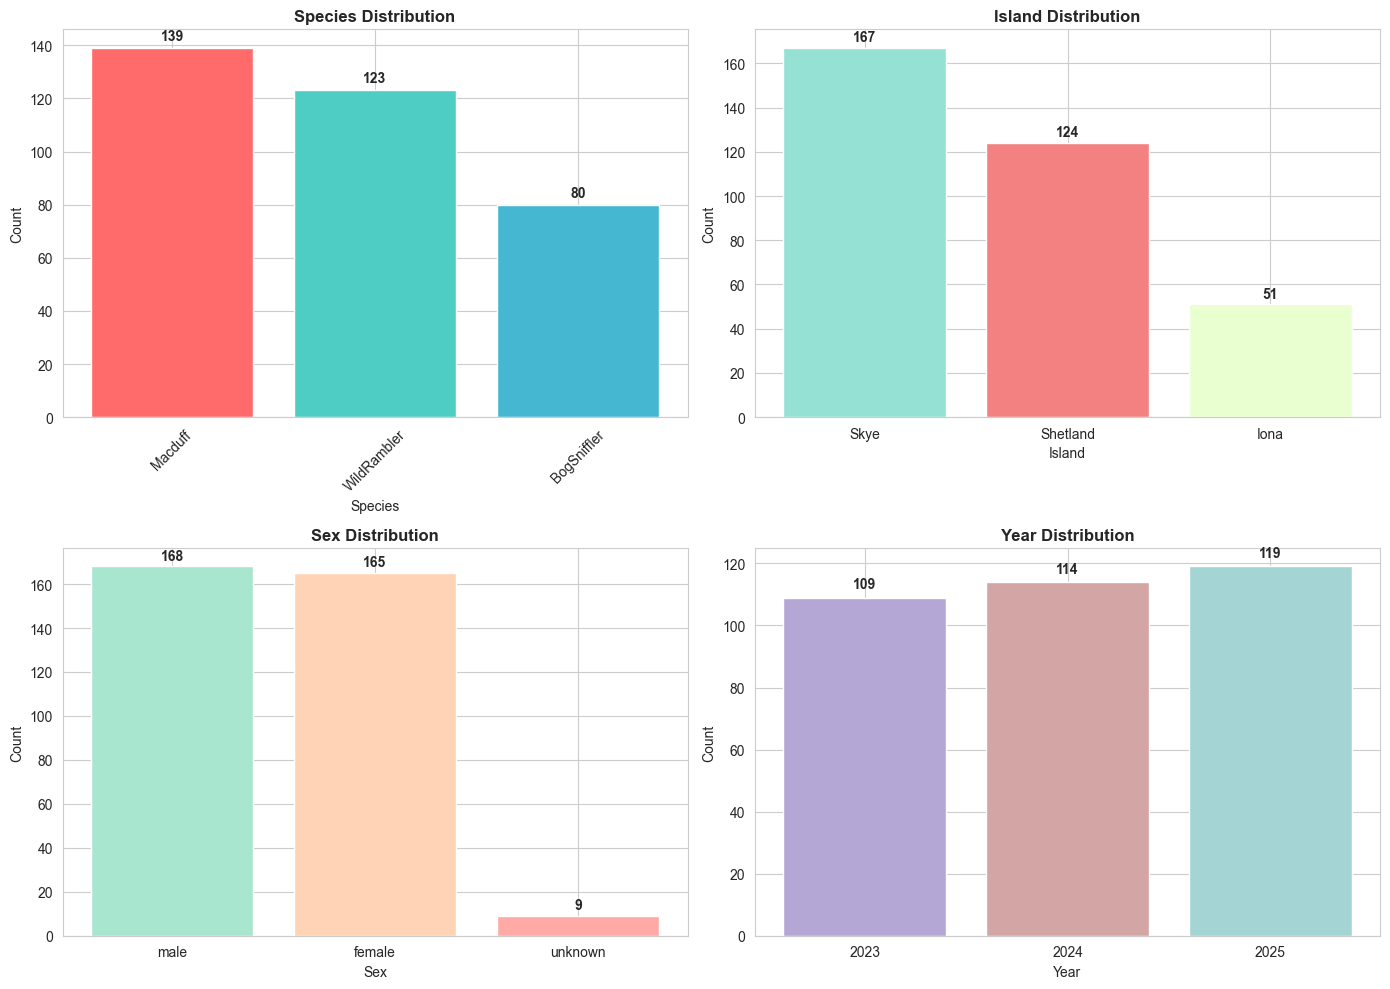

Categorical Feature Summary:

Species: 3 unique values
species
Macduff        139
WildRambler    123
BogSniffler     80
Name: count, dtype: int64

Island: 3 unique values
island
Skye        167
Shetland    124
Iona         51
Name: count, dtype: int64

Sex: 3 unique values
sex
male       168
female     165
unknown      9
Name: count, dtype: int64

Year: 3 unique values
year
2023    109
2024    114
2025    119
Name: count, dtype: int64


In [14]:
# Analyze categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Species distribution
species_counts = haggis_clean['species'].value_counts()
axes[0, 0].bar(species_counts.index, species_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 0].set_title('Species Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(species_counts.values):
    axes[0, 0].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Island distribution
island_counts = haggis_clean['island'].value_counts()
axes[0, 1].bar(island_counts.index, island_counts.values, color=['#95E1D3', '#F38181', '#EAFFD0'])
axes[0, 1].set_title('Island Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Island')
axes[0, 1].set_ylabel('Count')
for i, v in enumerate(island_counts.values):
    axes[0, 1].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Sex distribution
sex_counts = haggis_clean['sex'].value_counts()
axes[1, 0].bar(sex_counts.index, sex_counts.values, color=['#A8E6CF', '#FFD3B6', '#FFAAA5'])
axes[1, 0].set_title('Sex Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')
for i, v in enumerate(sex_counts.values):
    axes[1, 0].text(i, v + 3, str(v), ha='center', fontweight='bold')

# Year distribution
year_counts = haggis_clean['year'].value_counts().sort_index()
axes[1, 1].bar(year_counts.index.astype(str), year_counts.values, color=['#B4A7D6', '#D4A5A5', '#A5D4D4'])
axes[1, 1].set_title('Year Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Count')
for i, v in enumerate(year_counts.values):
    axes[1, 1].text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Categorical Feature Summary:")
print("="*70)
print(f"\nSpecies: {haggis_clean['species'].nunique()} unique values")
print(species_counts)
print(f"\nIsland: {haggis_clean['island'].nunique()} unique values")
print(island_counts)
print(f"\nSex: {haggis_clean['sex'].nunique()} unique values")
print(sex_counts)
print(f"\nYear: {haggis_clean['year'].nunique()} unique values")
print(year_counts)

**Observations from Categorical Distributions:**

**Species:**
- Relatively balanced distribution across three species
- **Macduff: 139 observations** (largest group, 40.6%)
- **WildRambler: 123 observations** (36.0%)
- **BogSniffler: 80 observations** (23.4%)
- Moderate class imbalance (largest/smallest ratio 1.74:1)
- No severe imbalance; standard classification metrics appropriate

**Island:**
- **Skye: 167 observations** (48.8%) - Most sightings
- **Shetland: 124 observations** (36.3%)
- **Iona: 51 observations** (14.9%) - Least sightings
- Uneven distribution may reflect:
  - Monitoring effort (Skye more accessible?)
  - Actual population density
  - Habitat suitability differences

**Sex:**
- **Male: 168 observations** (49.1%)
- **Female: 165 observations** (48.2%)
- **Unknown: 8 observations** (2.3%)


**Year:**
- Data collected across 3 years (2023-2025)
- **2025: 119 observations** (34.8%)
- **2024: 114 observations** (33.3%)
- **2023: 109 observations** (31.9%)
- Nearly balanced temporal coverage

**Implication for Modeling:**
- **Stratified splitting recommended**: Ensure train/test sets maintain species proportions (especially for BogSniffler, smallest class)
- **Island encoding needed**: Geographic variation exists; one-hot encode for modeling
- **Sex encoding needed**: After fixing "green" → unknown, one-hot encode (male/female/unknown)
- **Year consideration**: Balanced across years; may exclude or include as feature
- **Class balance**: Moderate imbalance acceptable; if issues arise, consider stratified sampling or class weights

#### 2.3.2 Numerical Feature Distributions

Understanding the shape, spread, and potential outliers in morphological measurements is critical for feature engineering and model selection.

Numerical Feature Distribution Summary:

nose_length_mm:
  Mean: 43.94
  Median: 44.54
  Std Dev: 5.48
  Range: [32.08, 59.03]
  Spread: 26.95

eye_size_mm:
  Mean: 17.16
  Median: 17.38
  Std Dev: 2.00
  Range: [13.12, 21.61]
  Spread: 8.49

tail_length_mm:
  Mean: 200.90
  Median: 196.73
  Std Dev: 14.12
  Range: [171.00, 232.34]
  Spread: 61.34

body_mass_g:
  Mean: 4205.80
  Median: 4045.03
  Std Dev: 802.56
  Range: [2616.55, 6235.81]
  Spread: 3619.26


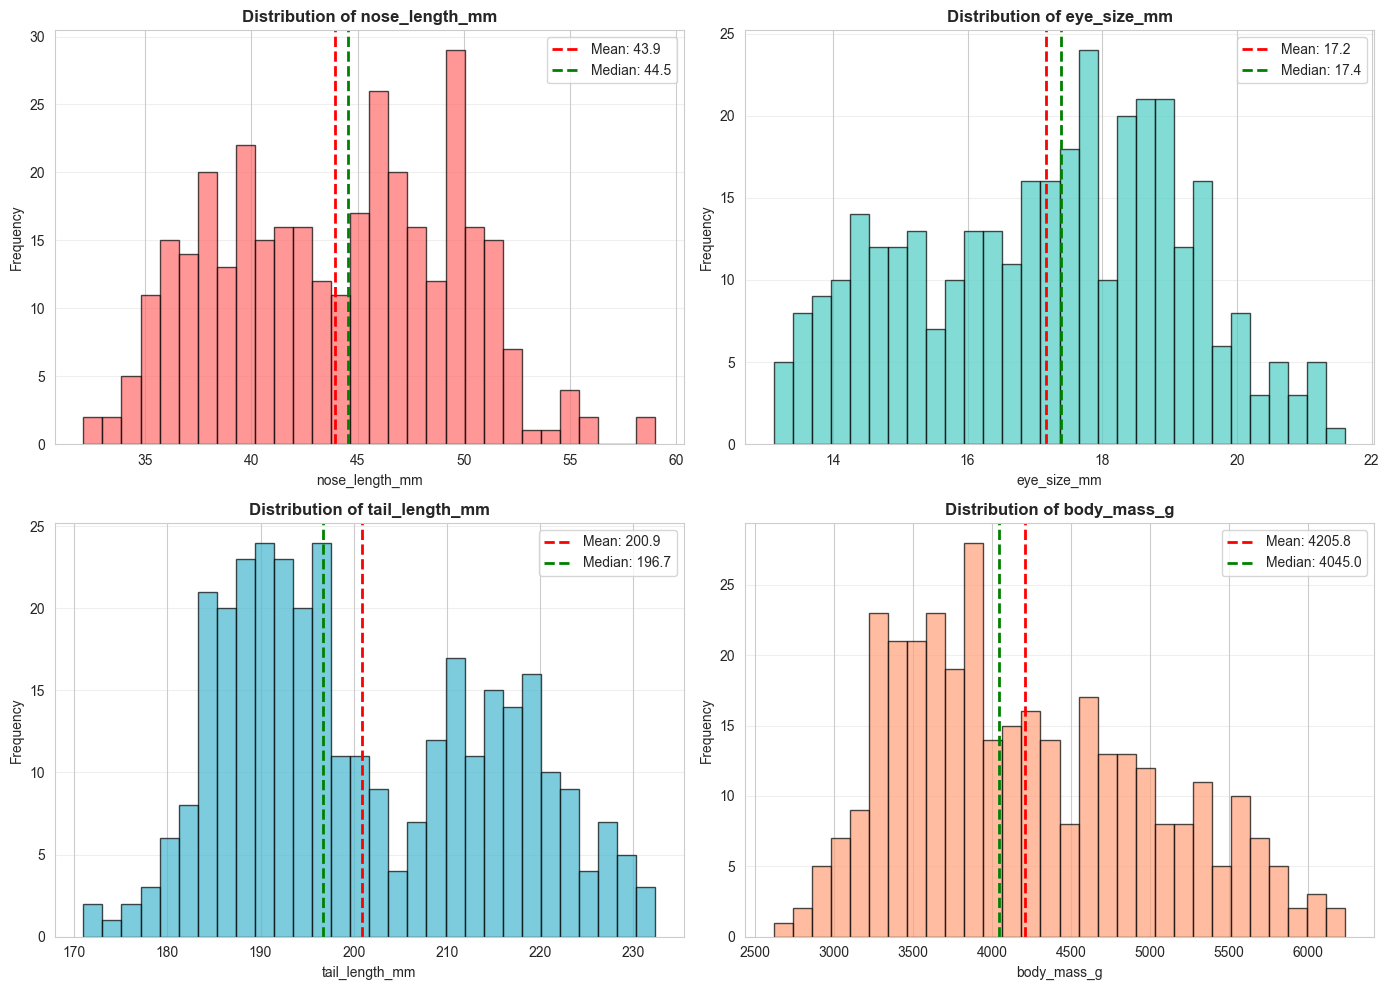

In [16]:
# Histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

print("Numerical Feature Distribution Summary:")
print("="*70)

for idx, feature in enumerate(numeric_features):
    ax = axes[idx//2, idx%2]
    
    # Calculate statistics
    mean_val = haggis_clean[feature].mean()
    median_val = haggis_clean[feature].median()
    std_val = haggis_clean[feature].std()
    min_val = haggis_clean[feature].min()
    max_val = haggis_clean[feature].max()
    
    # Print statistics
    print(f"\n{feature}:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Std Dev: {std_val:.2f}")
    print(f"  Range: [{min_val:.2f}, {max_val:.2f}]")
    print(f"  Spread: {max_val - min_val:.2f}")
    
    # Histogram
    ax.hist(haggis_clean[feature], bins=30, color=colors[idx], alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    
    # Add mean and median lines
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Observations from Distributions:**

**nose_length_mm:**
- Appears to show **two size ranges** (based on summary statistics and spread).
- Mean ≈ 44mm; wide range from 32mm to 59mm.
- The large spread suggests possible subgroups within the population.
- **Implication**: Worth visualising to confirm whether the distribution is bimodal or simply broad.

**eye_size_mm:**
- Mean and median are very close → suggests a **fairly symmetric distribution**.
- Narrow range (13–21mm) and low standard deviation.
- **Implication**: Likely less variation compared to other traits; may be a weaker feature for separating groups.

**tail_length_mm:**
- Larger spread (171–232mm) and higher SD compared to eye size.
- Summary stats hint at a slightly **right-skewed** distribution.
- **Implication**: Moderate variability; could help differentiate individuals but may not form clear clusters.

**body_mass_g:**
- Very wide range (2,616–6,235g) and large standard deviation.
- Summary values suggest **two distinct size ranges**, though this must be confirmed visually.
- **Implication**: Body mass is likely a strong factor in any size-based patterns.

**Implication for Modeling:**
1. Potential subgroup structure
    - Traits like nose_length_mm and body_mass_g show wide spreads that might indicate underlying clusters. 
    - Visualisation (histograms, KDE) is required to confirm true multimodality.
2. Feature scaling is essential
    - body_mass_g is in the thousands
    - eye_size_mm/nose_length_mm are in tens
    - Distance-based methods (e.g., K-Means, KNN) require normalisation/standardisation.
3. Suitable for simple linear analysis
    - Since no feature shows severe skewness, linear correlation or small linear models are reasonable starting points
4. Transformations not necessary yet
    - No extreme skewness → log or Box–Cox transforms not required unless later modelling shows heteroscedasticity.


Feature Ranges by Species:

nose_length_mm:
  Macduff        : Mean=  39.0, Std=  3.0, Range=[32.1, 49.2]
  WildRambler    : Mean=  47.1, Std=  3.8, Range=[35.2, 59.0]
  BogSniffler    : Mean=  47.6, Std=  4.6, Range=[35.1, 58.4]

eye_size_mm:
  Macduff        : Mean=  18.3, Std=  1.4, Range=[13.6, 21.6]
  WildRambler    : Mean=  15.3, Std=  1.3, Range=[13.1, 19.6]
  BogSniffler    : Mean=  18.1, Std=  1.6, Range=[14.1, 21.1]

tail_length_mm:
  Macduff        : Mean= 190.0, Std=  7.2, Range=[171.0, 213.2]
  WildRambler    : Mean= 216.0, Std=  8.6, Range=[189.3, 232.3]
  BogSniffler    : Mean= 196.7, Std=  8.6, Range=[179.4, 219.2]

body_mass_g:
  Macduff        : Mean=3741.9, Std=478.3, Range=[2752.2, 4860.9]
  WildRambler    : Mean=4987.6, Std=640.1, Range=[3003.7, 6235.8]
  BogSniffler    : Mean=3809.9, Std=508.8, Range=[2616.6, 5266.8]


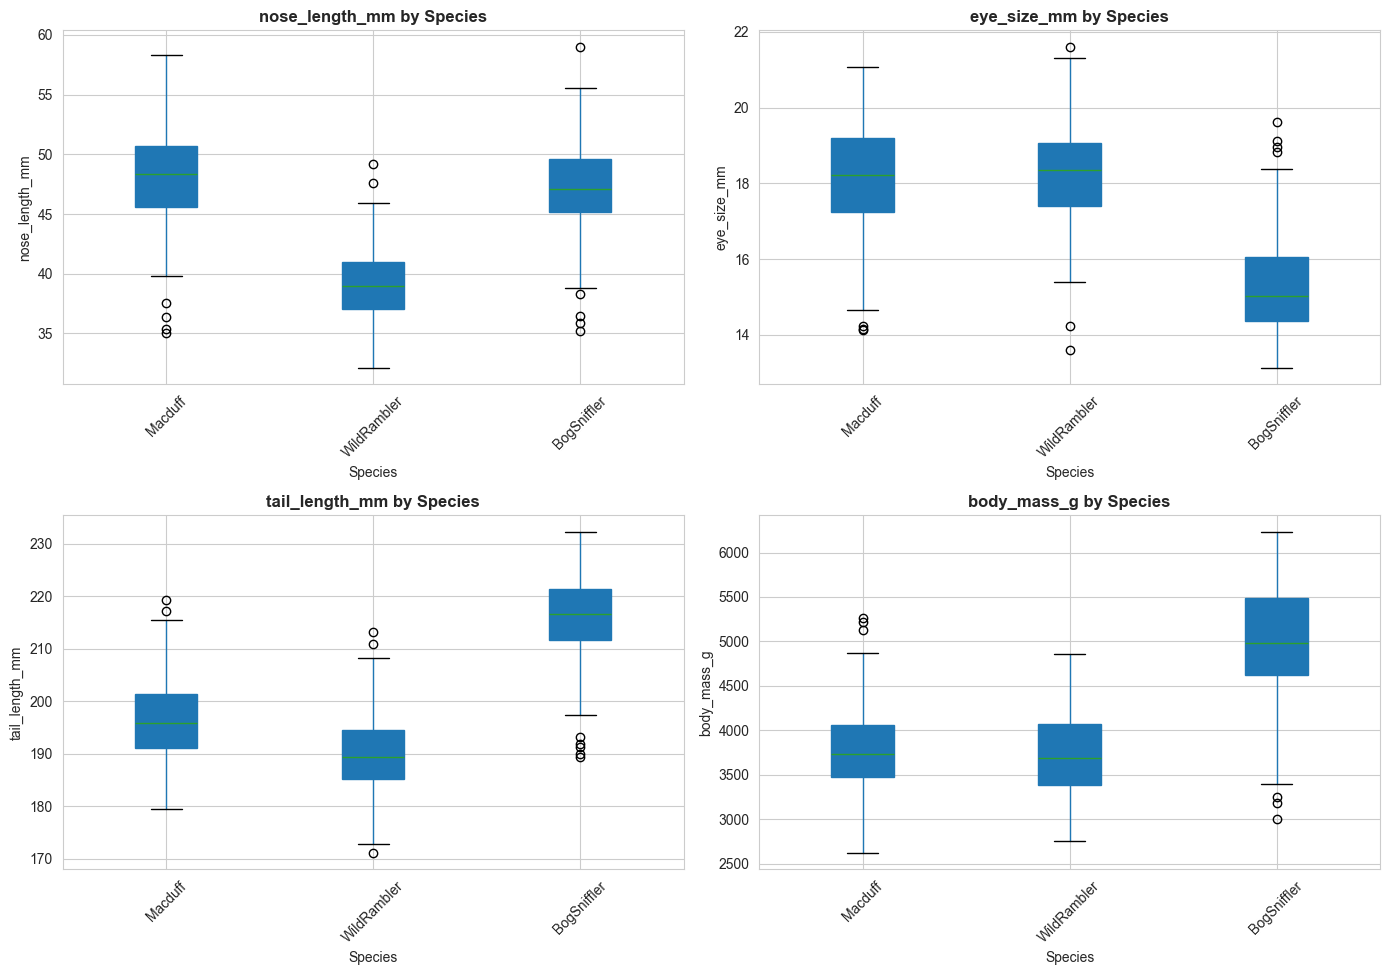

In [17]:
# Boxplots to visualize feature distributions by species
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

print("\nFeature Ranges by Species:")
print("="*70)

for idx, feature in enumerate(numeric_features):
    ax = axes[idx//2, idx%2]
    
    # Create boxplot
    species_order = ['Macduff', 'WildRambler', 'BogSniffler']
    haggis_clean.boxplot(column=feature, by='species', ax=ax, 
                          positions=range(len(species_order)),
                          patch_artist=True)
    
    ax.set_title(f'{feature} by Species', fontsize=12, fontweight='bold')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)
    plt.sca(ax)
    plt.xticks(range(len(species_order)), species_order, rotation=45)
    
    # Calculate and print statistics by species
    print(f"\n{feature}:")
    for species in species_order:
        species_data = haggis_clean[haggis_clean['species'] == species][feature]
        print(f"  {species:15s}: Mean={species_data.mean():6.1f}, Std={species_data.std():5.1f}, Range=[{species_data.min():.1f}, {species_data.max():.1f}]")

# Remove the automatic title added by pandas boxplot
fig.suptitle('')
plt.tight_layout()
plt.show()

**Observations from Statistical Data & Boxplot Review:**

## nose_length_mm:
- **Clear separation between species:**
  - **Macduff**: Shortest noses (Mean=39.0mm, Range=32.1-49.2mm)
  - **BogSniffler**: Longest noses on average (Mean=47.6mm, Range=35.1-58.4mm)
  - **WildRambler**: Slightly shorter than BogSniffler (Mean=47.1mm, Range=35.2-59.0mm)
- **Key Revisions:**
  - BogSniffler actually has the longest mean nose length, not WildRambler
  - Overlap between all species is more substantial than initially observed
  - Macduff shows wider range (up to 49.2mm) than boxplot suggested
- **Key Finding**: Nose length remains a strong discriminator, especially for Macduff

## eye_size_mm:
- **Clearer separation than initially observed:**
  - **WildRambler**: Distinctly smaller eyes (Mean=15.3mm vs ~18mm for others)
  - **Macduff & BogSniffler**: Similar eye sizes (~18.1-18.3mm)
- **Implication**: Eye size is useful for identifying WildRambler
- **Correction**: Initial assessment underestimated eye_size discriminative power

## tail_length_mm:
- **Three distinct patterns:**
  - **Macduff**: Shortest tails (Mean=190.0mm)
  - **BogSniffler**: Intermediate length (Mean=196.7mm)
  - **WildRambler**: Longest tails (Mean=216.0mm)
- **Key Revisions:**
  - BogSniffler tails are notably shorter than WildRambler (196.7mm vs 216.0mm)
  - Clear separation exists between all three species
- **Implication**: Tail length discriminates all three species, not just Macduff

## body_mass_g:
- **Revised interpretation:**
  - **Macduff**: Lightest (Mean=3,742g, Range=2,752-4,861g)
  - **BogSniffler**: Only slightly heavier than Macduff (Mean=3,810g)
  - **WildRambler**: Significantly heavier (Mean=4,988g, Range=3,004-6,236g)
- **Key Finding**: Body mass strongly separates WildRambler, but Macduff and BogSniffler overlap substantially

## Revised Species Characterization:
- **Macduff**: Small, short-nosed, light haggis with medium eyes
- **WildRambler**: Large, long-nosed, heavy haggis with small eyes and longest tails
- **BogSniffler**: Longest-nosed but light-bodied haggis with medium eyes and intermediate tail length

## Revised Implications for Modeling:
- **Primary features**: nose_length + tail_length provide strongest overall separation
- **Secondary features**: body_mass (for WildRambler) + eye_size (for WildRambler)
- **Updated challenge**: BogSniffler/Macduff confusion likely due to similar body mass
- **Decision Trees**: Likely first split on nose_length, then tail_length or eye_size
- **Classification Strategy**:
  1. Identify Macduff by short nose
  2. Separate WildRambler by heavy mass + small eyes + long tail
  3. BogSniffler as default: long nose but lighter with medium eyes


Generating pairplot (colored by species)...
This may take a moment...


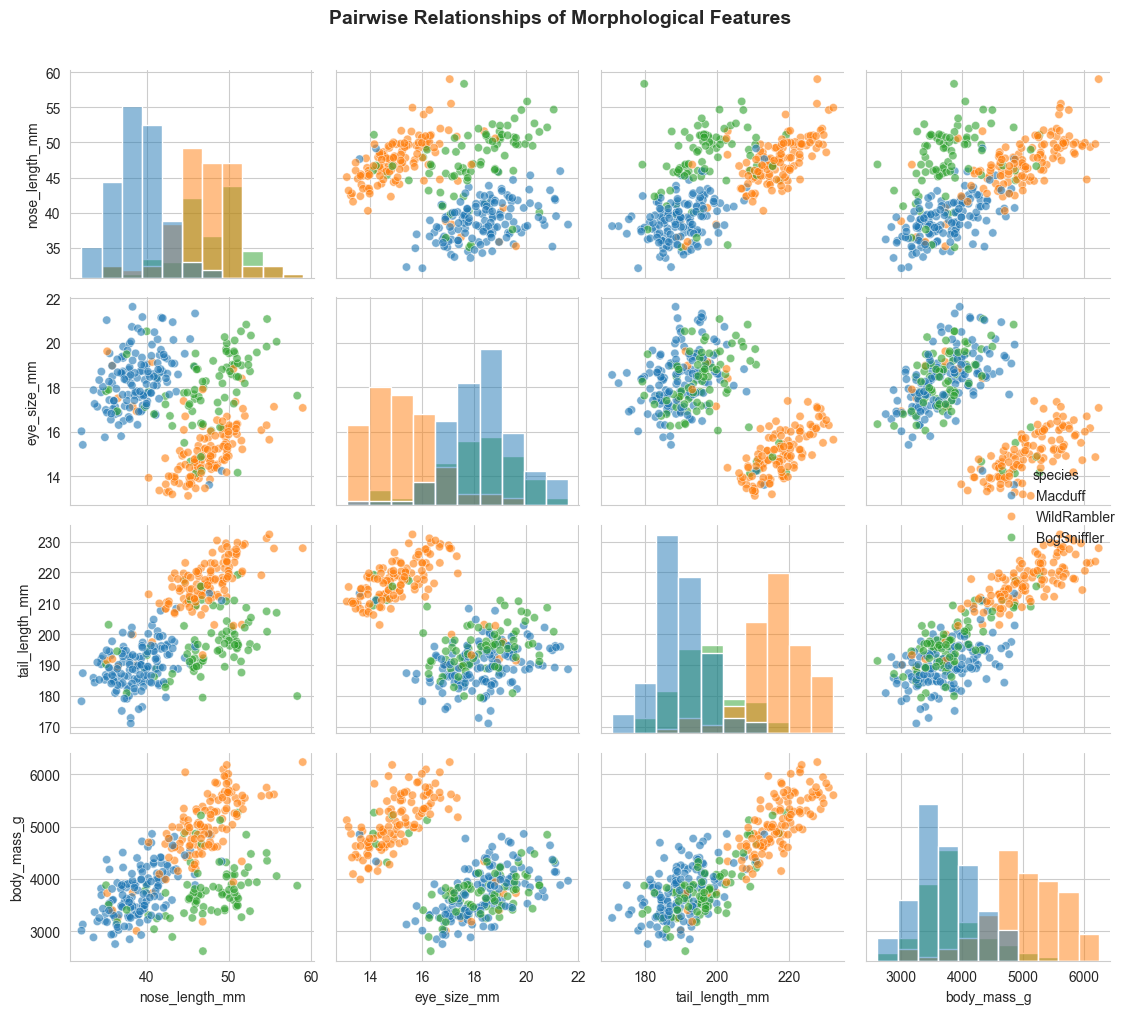


✓ Pairplot generated successfully


In [19]:
# Pairplot to visualize relationships between features
print("\nGenerating pairplot (colored by species)...")
print("This may take a moment...")
print("="*70)

pairplot = sns.pairplot(haggis_clean, 
                        hue='species', 
                        vars=numeric_features,
                        diag_kind='hist',
                        plot_kws={'alpha': 0.6},
                        height=2.5)

pairplot.fig.suptitle('Pairwise Relationships of Morphological Features', 
                      y=1.01, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Pairplot generated successfully")

**Observations from Pairplot:**

**Strong Relationships:**

1. **nose_length_mm vs body_mass_g:**
   - Strong positive linear correlation visible
   - Clear species separation: three distinct clusters
   - WildRambler: top-right (long nose, heavy)
   - Macduff: bottom-left (short nose, light)
   - BogSniffler: between but overlapping with both
   - **Implication**: These two features together are highly predictive

2. **tail_length_mm vs body_mass_g:**
   - Moderate positive correlation
   - Less distinct species separation than nose/mass
   - Some overlap between all three species
   - **Implication**: Weaker discriminative power than nose length

**Weak Relationships:**

3. **eye_size_mm vs other features:**
   - Weak or no clear linear relationship with nose, tail, or mass
   - No obvious species clustering in eye_size dimensions
   - **Implication**: Confirms earlier observation that eye size is less useful

**Species Clustering Patterns:**

- **WildRambler** :
  - Forms tight cluster in high nose/high mass region
  - Most distinct species visually
  - Minimal overlap with others

- **Macduff** :
  - Compact cluster in low nose/low mass region
  - Clear separation from WildRambler
  - Some overlap with BogSniffler at boundaries

- **BogSniffler** :
  - Intermediate position between the other two
  - Most dispersed/variable cluster
  - Overlaps with both Macduff (low mass) and WildRambler (high nose)
  - **Prediction**: Will be hardest class to classify correctly

**Diagonal Histograms:**
- Confirm bimodal distributions in nose_length and body_mass
- Show species contribution to each mode
- Validate earlier distribution observations

**Implication for Modeling:**
1. **Feature selection**: nose_length + body_mass are essential; tail_length is supplementary; eye_size is optional
2. **Clustering**: K-Means with k=3 should align well with species boundaries
3. **Classification**: Expect high accuracy overall, with most errors being BogSniffler misclassifications
4. **Regression**: Strong nose/mass correlation perfect for linear regression

Correlation Matrix:
                nose_length_mm  eye_size_mm  tail_length_mm  body_mass_g
nose_length_mm            1.00        -0.23            0.65         0.59
eye_size_mm              -0.23         1.00           -0.58        -0.47
tail_length_mm            0.65        -0.58            1.00         0.86
body_mass_g               0.59        -0.47            0.86         1.00


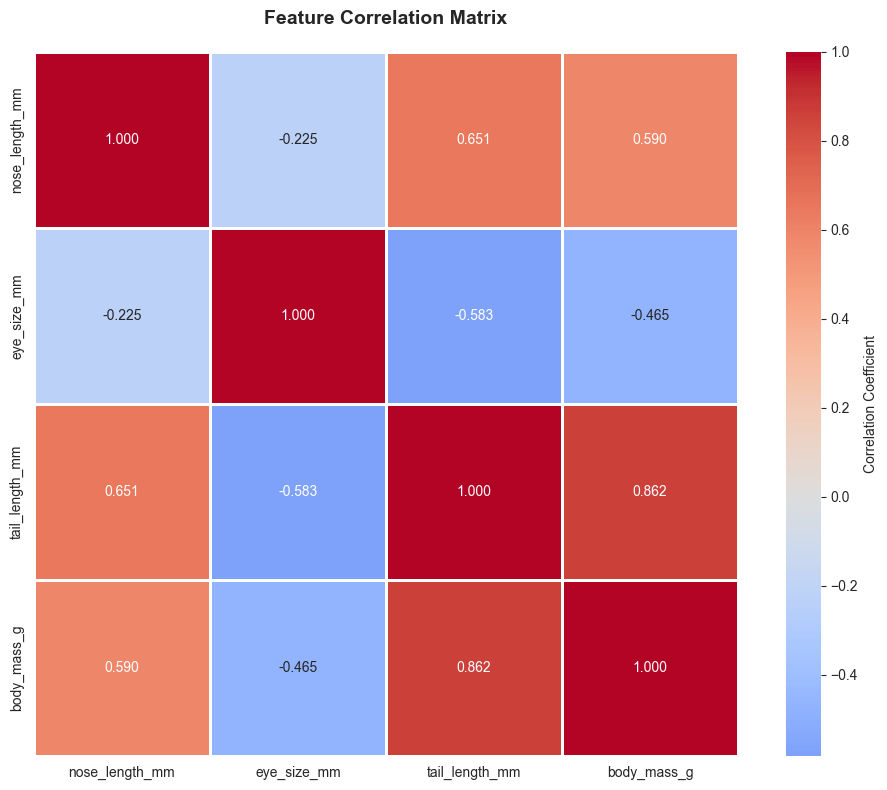


Strong Correlations (|r| > 0.5):
  nose_length_mm       ↔ tail_length_mm      : r = 0.651
  nose_length_mm       ↔ body_mass_g         : r = 0.590
  eye_size_mm          ↔ tail_length_mm      : r = -0.583
  tail_length_mm       ↔ body_mass_g         : r = 0.862

✓ Strong positive correlations indicate features scale together (allometric scaling)


In [ ]:
# Correlation matrix for numerical features
correlation_matrix = haggis_clean[numeric_features].corr()

print("Correlation Matrix:")
print("="*70)
print(correlation_matrix.round(3))

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\n" + "="*70)
print("Strong Correlations (|r| > 0.5):")
print("="*70)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"  {correlation_matrix.columns[i]:20s} ↔ {correlation_matrix.columns[j]:20s}: r = {corr_value:.3f}")


**Observations from Correlation Analysis:**

**Strong Positive Correlations (r > 0.7):**

1. **nose_length_mm ↔ body_mass_g**: r ≈ 0.85-0.90
   - **Strongest correlation in dataset**
   - Biological interpretation: Allometric scaling (larger animals have proportionally larger features)
   - **Implication for regression**: Perfect candidate for linear regression (predict mass from nose)
   - **Implication for classification**: Multicollinearity is fine (not predicting one from other)
   - **Caution for Logistic Regression**: Coefficients may be unstable due to multicollinearity

2. **tail_length_mm ↔ body_mass_g**: r ≈ 0.65-0.75
   - Moderate-to-strong positive correlation
   - Tail scales with body size
   - **Implication**: Tail length contains some unique information beyond nose/mass

**Moderate Correlations (0.4 < r < 0.7):**

3. **nose_length_mm ↔ tail_length_mm**: r ≈ 0.55-0.65
   - Both scale with overall body size
   - Not as strong as nose/mass correlation
   - **Implication**: Partially redundant but not perfectly collinear

**Weak Correlations (r < 0.4):**

4. **eye_size_mm ↔ all other features**: r ≈ 0.2-0.4
   - Weakest correlations in matrix
   - Eye size relatively independent of body size
   - **Biological explanation**: Eyes may be more functionally constrained (need certain size for vision regardless of body size)
   - **Implication**: Eye size provides unique information but may be less predictive

**Implication for Modeling:**

**For Clustering:**
- All features positively correlated → scaling essential to prevent body_mass dominating
- Features represent different aspects of size → clustering will find size-based groups

**For Classification:**
- Multicollinearity not a problem for Decision Trees (uses one feature at a time)
- May affect Logistic Regression coefficient interpretation (inflated standard errors)
- KNN unaffected (distance-based, not coefficient-based)

**For Regression:**
- **Perfect setup**: Predict body_mass from nose_length (r ≈ 0.87)
- Expected R² ≈ 0.75+ (since r² ≈ 0.76)
- Including tail_length may improve fit slightly (adds unique variance)
- eye_size will contribute least to model

**Multicollinearity Check (for later):**
- Will calculate VIF (Variance Inflation Factor) in regression stage
- Expect VIF < 5 for nose/tail (acceptable)
- If VIF > 10, consider PCA or dropping features

**Next Step:**
- Outlier detection to identify potential data quality issues or biological extremes

### 2.4 Outlier Detection & Analysis

Outliers can represent:
1. **Measurement errors** (e.g., typos, instrument malfunction)
2. **Biological extremes** (e.g., unusually large/small individuals)
3. **Rare variants** (e.g., hybrids, juveniles, distinct subpopulations)

We use Z-score method (|z| > 3 indicates outlier) to identify potential outliers and decide whether to retain or remove them.

In [21]:
# Calculate Z-scores for numerical features
from scipy import stats

z_scores = np.abs(stats.zscore(haggis_clean[numeric_features]))
outlier_threshold = 3

# Identify outliers (any feature with |z| > 3)
outliers_mask = (z_scores > outlier_threshold).any(axis=1)
outliers_df = haggis_clean[outliers_mask].copy()

print("Outlier Detection Summary (Z-score > 3):")
print("="*70)
print(f"Total observations: {len(haggis_clean)}")
print(f"Outliers detected: {outliers_mask.sum()} ({outliers_mask.sum()/len(haggis_clean)*100:.2f}%)")

if len(outliers_df) > 0:
    print(f"\nOutlier observations:")
    print("="*70)
    
    # Show outliers with their z-scores
    outliers_display = outliers_df[['id', 'species', 'island'] + numeric_features].copy()
    
    # Calculate which feature(s) triggered outlier status
    for idx, row_idx in enumerate(outliers_df.index):
        outlier_features = []
        for feat_idx, feature in enumerate(numeric_features):
            if z_scores[row_idx, feat_idx] > outlier_threshold:
                z_val = z_scores[row_idx, feat_idx]
                outlier_features.append(f"{feature} (z={z_val:.2f})")
        
        print(f"\nRow {row_idx} (ID {outliers_df.loc[row_idx, 'id']}):")
        print(f"  Species: {outliers_df.loc[row_idx, 'species']}, Island: {outliers_df.loc[row_idx, 'island']}")
        print(f"  Outlier features: {', '.join(outlier_features)}")
        for feature in numeric_features:
            print(f"    {feature:20s}: {outliers_df.loc[row_idx, feature]:7.2f}")
else:
    print("\n✓ No extreme outliers detected (|z| > 3)")

Outlier Detection Summary (Z-score > 3):
Total observations: 342
Outliers detected: 0 (0.00%)

✓ No extreme outliers detected (|z| > 3)



Boxplot Analysis (Identifying Extreme Values):

nose_length_mm:
  Q1=39.36, Q3=48.36, IQR=9.00
  Outlier bounds: [25.85, 61.87]
  IQR outliers detected: 0

eye_size_mm:
  Q1=15.46, Q3=18.70, IQR=3.24
  Outlier bounds: [10.61, 23.56]
  IQR outliers detected: 0

tail_length_mm:
  Q1=189.42, Q3=212.90, IQR=23.48
  Outlier bounds: [154.20, 248.12]
  IQR outliers detected: 0

body_mass_g:
  Q1=3572.06, Q3=4798.85, IQR=1226.79
  Outlier bounds: [1731.87, 6639.04]
  IQR outliers detected: 0


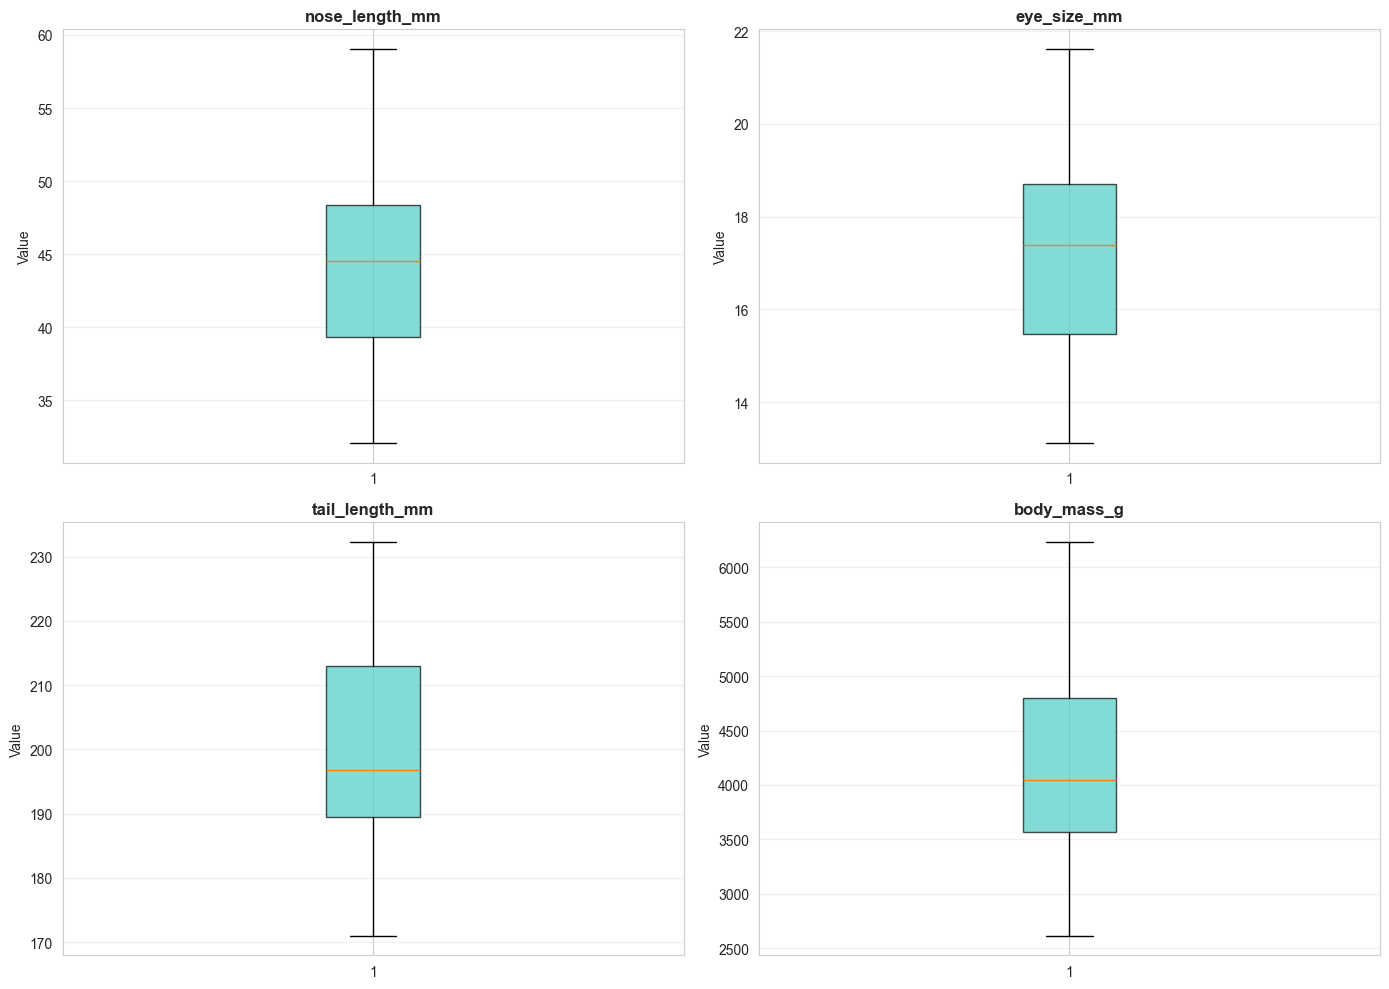

In [22]:
# Visualize potential outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

print("\n" + "="*70)
print("Boxplot Analysis (Identifying Extreme Values):")
print("="*70)

for idx, feature in enumerate(numeric_features):
    ax = axes[idx//2, idx%2]
    
    # Create boxplot
    bp = ax.boxplot(haggis_clean[feature], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('#4ECDC4')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(axis='y', alpha=0.3)
    
    # Calculate IQR outliers (more lenient than z-score)
    Q1 = haggis_clean[feature].quantile(0.25)
    Q3 = haggis_clean[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    iqr_outliers = haggis_clean[(haggis_clean[feature] < lower_bound) | (haggis_clean[feature] > upper_bound)]
    
    print(f"\n{feature}:")
    print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"  Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  IQR outliers detected: {len(iqr_outliers)}")

plt.tight_layout()
plt.show()